In [4]:
%matplotlib inline
import nflgame
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('bmh')

CURRENT_WEEK = 1

games = nflgame.games(2017, week=CURRENT_WEEK)

for p in plyrs.rushing().sort('passing_yds').limit(5):
    msg = '%s %d/%d %d yards and %d TDs'
    print msg % (p, p.passing_cmp, p.passing_att, p.passing_yds, p.passing_tds)

A.Smith 28/35 368 yards and 4 TDs
S.Bradford 27/32 346 yards and 3 TDs
M.Ryan 21/30 321 yards and 1 TDs
A.Rodgers 28/42 311 yards and 1 TDs
C.Wentz 26/39 307 yards and 2 TDs


In [2]:
b = [i for i in nflgame.players.itervalues() if 'Matt Barkley' in i.name][0]
b.position
b.gsis_id
c = b.stats(2016, week=16)
c.stats

OrderedDict([(u'passing_att', 40),
             (u'passing_twoptm', 0),
             (u'passing_twopta', 0),
             (u'passing_yds', 323),
             (u'passing_cmp', 24),
             (u'passing_ints', 5),
             (u'passing_tds', 2)])

In [3]:
def retrieve_player_stats(token, year, weeks, token_type):
    p = [p for p in nflgame.players.itervalues() if getattr(p, token_type) == token][0]
    player_dict = {
        'name': p.name,
        'gsis_id': p.gsis_id,
        'position': p.position,
        'team': p.team,
        'ppr_points': {},
    }
    for week in weeks:
        player_stats = p.stats(year, week=week)

        if len(player_stats.stats) == 0:
            continue

        ppr_points = round(
            player_stats.stats.get('receiving_tds', 0) * 6 \
            + player_stats.stats.get('rushing_tds', 0) * 6 \
            + player_stats.stats.get('puntret_tds', 0) * 6 \
            + player_stats.stats.get('kickret_tds', 0) * 6 \
            + player_stats.stats.get('passing_tds', 0) * 4 \
            + player_stats.stats.get('receiving_rec', 0) * 1 \
            + player_stats.stats.get('receiving_yds', 0) * .1 \
            + player_stats.stats.get('rushing_yds', 0) * .1 \
            + player_stats.stats.get('passing_yds', 0) * .04 \
            + player_stats.stats.get('passing_ints', 0) * -2 \
            + player_stats.stats.get('fumbles_lost', 0) * -2 \
#             + player_stats.stats.get('kickret_ret', 0) * player_stats.stats.get('kickret_avg', 0) * .05 \
#             + player_stats.stats.get('puntret_ret', 0) * player_stats.stats.get('puntret_avg', 0) * .05 \
            + player_stats.stats.get('rushing_twoptm', 0) * 2 \
            + player_stats.stats.get('passing_twoptm', 0) * 2 \
            + player_stats.stats.get('receiving_twoptm', 0) * 2 \
            , 2
        )
        player_dict['ppr_points'][week] = ppr_points
    return player_dict

In [5]:
players = []
for player in nflgame.players.values():
    if player.position not in (['QB', 'WR', 'RB', 'TE']):
        continue
    player_dict = retrieve_player_stats(player.gsis_id,
                                        year=2017,
                                        weeks=range(CURRENT_WEEK, 17),
                                        token_type='gsis_id')
#     player_dict['ppr_points'].update(
#         retrieve_player_stats(player.gsis_id,
#                               year=2017,
#                               weeks=[16],
#                               token_type='gsis_id')['ppr_points'])
    players.append(player_dict)

players

[{'gsis_id': u'00-0033561',
  'name': u'DJ Pumphrey',
  'position': u'RB',
  'ppr_points': {},
  'team': u'PHI'},
 {'gsis_id': u'00-0033562',
  'name': u'Ryan Switzer',
  'position': u'WR',
  'ppr_points': {1: 0.0,
   2: 0.0,
   3: 0.3,
   4: -1.7,
   5: 0.0,
   7: 1.5,
   8: 1.7,
   9: 0.0,
   10: 0.0,
   11: 0.0,
   12: -0.4,
   13: 6.0,
   14: 0.0,
   15: 0.0,
   16: 0.0},
  'team': u'OAK'},
 {'gsis_id': u'00-0033567',
  'name': u'Brian Hill',
  'position': u'RB',
  'ppr_points': {14: 2.0, 15: 1.2, 16: 6.1},
  'team': u'CIN'},
 {'gsis_id': u'00-0031408',
  'name': u'Mike Evans',
  'position': u'WR',
  'ppr_points': {2: 22.3,
   3: 13.7,
   4: 17.7,
   5: 9.9,
   6: 18.5,
   7: 21.8,
   8: 11.0,
   9: 2.3,
   11: 14.2,
   12: 13.8,
   13: 5.3,
   14: 4.5,
   15: 18.9,
   16: 16.7},
  'team': u'TB'},
 {'gsis_id': u'00-0031407',
  'name': u'Blake Bortles',
  'position': u'QB',
  'ppr_points': {1: 10.3,
   2: 9.82,
   3: 27.56,
   4: 11.4,
   5: 2.7,
   6: 13.54,
   7: 16.3,
   9: 16.36

In [233]:
# robert_griffin = retrieve_player_stats('Robert Griffin III', 2016, range(CURRENT_WEEK, 17), token_type='name')
# david_johnson = retrieve_player_stats('David Johnson', 2016, range(1, 17), token_type='name')
players.append(david_johnson)
# players.append(robert_griffin)

In [234]:
import pandas as pd

ppr_points = pd.DataFrame([p['ppr_points'] for p in players],
                          index=[p['gsis_id'] for p in players])

df = pd.DataFrame(players).set_index('gsis_id').join(ppr_points).drop('ppr_points', axis=1)
df

,name,position,team,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
00-0019596,Tom Brady,QB,NE,10.68,30.78,35.72,20.48,12.62,16.18,18.46,17.52,nan,22.64,25.56,20.68,8.32,9.32,15.72,15.56
00-0020531,Drew Brees,QB,NO,15.64,22.24,20.80,19.02,nan,11.54,19.14,11.76,18.72,13.96,21.60,14.34,14.46,17.04,17.30,11.16
00-0021206,Josh McCown,QB,NYJ,9.48,15.74,14.66,4.96,13.46,20.26,24.46,18.28,16.90,12.48,nan,25.08,31.14,-1.46,nan,nan
00-0022787,Matt Schaub,QB,ATL,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
00-0022803,Eli Manning,QB,NYG,6.70,11.56,22.64,27.72,13.00,9.12,7.36,nan,12.80,16.92,8.70,2.42,nan,9.12,27.36,5.02
00-0022921,Larry Fitzgerald,WR,ARI,13.40,5.10,33.90,13.20,11.10,27.80,5.90,nan,12.00,21.30,24.10,6.20,25.80,9.40,11.00,27.74
00-0022924,Ben Roethlisberger,QB,PIT,15.72,17.52,12.00,10.54,2.58,11.88,16.66,14.48,nan,17.94,28.96,30.54,18.00,28.74,18.24,16.94
00-0022942,Philip Rivers,QB,SD,17.68,17.24,3.48,19.88,20.82,14.32,15.32,10.48,nan,15.30,18.04,28.86,17.56,20.76,7.08,15.60
00-0022943,Benjamin Watson,TE,NO,nan,17.10,10.20,9.30,2.20,8.80,8.80,8.60,11.10,nan,4.30,5.90,11.40,nan,17.40,9.00
00-0023436,Alex Smith,QB,WAS,31.02,16.14,15.10,27.32,26.86,15.14,25.68,13.38,18.42,nan,7.90,13.46,37.64,11.12,18.54,17.46


In [240]:
df = (
    df.drop_duplicates()
    .drop_duplicates(['name', 'position', 'team'], keep='last')
)
df.loc[df.name == 'David Johnson']

,name,position,team,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
00-0032187,David Johnson,RB,ARI,23.20,17.30,26.10,14.40,33.50,34.80,25.10,17.80,nan,27.10,35.00,30.10,38.50,17.10,26.80,33.60


In [241]:
# df.loc[df.name == 'Ty Montgomery', 'position'] = 'RB'
# df.loc[df.name == 'Matt Barkley', 'position'] = 'QB'
# df.loc[df.name == 'Matt Barkley', 'team'] = 'CHI'
# df.loc[df.name == 'Robert Griffin III', 'position'] = 'QB'
# df.loc[df.name == 'Robert Griffin III', 'team'] = 'CLE'
df.to_csv('fantasy_2017.csv')

In [242]:
df = df.mean(1).sort_values(ascending=False).dropna().to_frame().join(df).sort_values(0, ascending=False)
df

,0,name,position,team,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
00-0032187,26.69,David Johnson,RB,ARI,23.20,17.30,26.10,14.40,33.50,34.80,25.10,17.80,nan,27.10,35.00,30.10,38.50,17.10,26.80,33.60
00-0032241,25.55,Todd Gurley,RB,LA,20.60,26.60,37.90,34.50,5.00,13.00,25.40,nan,24.40,19.60,14.60,16.80,21.80,28.50,45.00,49.60
00-0033537,24.12,Deshaun Watson,QB,HOU,5.68,17.70,20.14,33.72,35.54,23.30,nan,32.78,nan,nan,nan,nan,nan,nan,nan,nan
00-0030496,22.77,Le'Veon Bell,RB,PIT,7.70,13.10,21.80,34.60,19.30,28.10,22.20,14.10,nan,16.20,19.30,28.30,29.20,39.50,27.50,20.70
00-0027793,22.16,Antonio Brown,WR,PIT,29.20,11.20,27.00,7.40,25.70,29.50,16.50,12.00,nan,7.70,42.40,40.90,24.10,32.30,4.40,nan
00-0029263,21.83,Russell Wilson,QB,SEA,8.32,15.32,33.52,27.60,11.52,nan,26.36,35.08,23.58,19.42,30.92,23.62,24.18,21.84,11.58,14.62
00-0032950,21.67,Carson Wentz,QB,PHI,18.88,24.82,13.24,15.08,27.26,21.38,31.02,17.14,24.76,nan,20.02,23.98,16.92,27.24,nan,nan
00-0033045,20.68,Ezekiel Elliott,RB,DAL,19.00,6.20,18.40,29.90,14.20,nan,40.90,26.40,15.30,nan,nan,nan,nan,nan,nan,15.80
00-0030564,20.65,DeAndre Hopkins,WR,HOU,18.50,14.30,14.60,26.70,27.20,9.90,nan,36.40,20.60,18.10,17.60,19.50,16.00,35.90,18.00,16.50
00-0023436,19.68,Alex Smith,QB,WAS,31.02,16.14,15.10,27.32,26.86,15.14,25.68,13.38,18.42,nan,7.90,13.46,37.64,11.12,18.54,17.46


(0, 0.1)

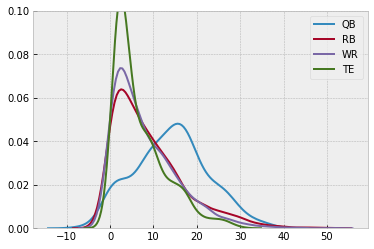

In [243]:
import seaborn as sns

qb_scores = np.ravel(df.loc[df.position == 'QB', range(1,17)].values)
qb_scores = qb_scores[~np.isnan(qb_scores)]
sns.kdeplot(qb_scores, label='QB')

rb_scores = np.ravel(df.loc[df.position == 'RB', range(1,17)].values)
rb_scores = rb_scores[~np.isnan(rb_scores)]
sns.kdeplot(rb_scores, label='RB')

wr_scores = np.ravel(df.loc[df.position == 'WR', range(1,17)].values)
wr_scores = wr_scores[~np.isnan(wr_scores)]
sns.kdeplot(wr_scores, label='WR')

te_scores = np.ravel(df.loc[df.position == 'TE', range(1,17)].values)
te_scores = te_scores[~np.isnan(te_scores)]
sns.kdeplot(te_scores, label='TE')

plt.legend(loc=0)
plt.ylim(0,.1)

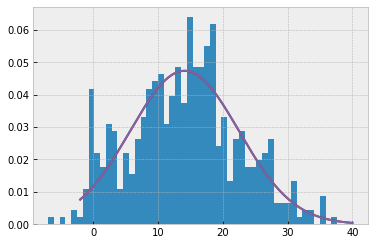

In [244]:
# Modeling QB scores
from scipy.stats import t, norm

plt.hist(qb_scores, bins=50, normed=True)

X = np.linspace(-2, 40, 401)
y = t.pdf(x=X, scale=np.std(qb_scores), df=len(qb_scores),
          loc=np.mean(qb_scores))
y2 = norm.pdf(x=X, scale=np.std(qb_scores),
          loc=np.mean(qb_scores))

plt.plot(X, y)
plt.plot(X, y2)

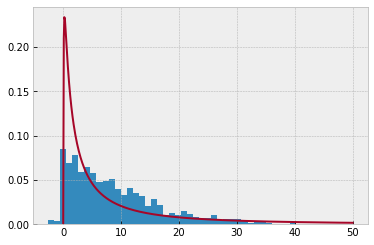

In [245]:
# Modeling RBs
from scipy.stats import lognorm

plt.hist(rb_scores, bins=50, normed=True)
rb_scores[rb_scores <= 0] = .01

X = np.linspace(0, 50, 501)
y = lognorm.pdf(x=X, s=np.std(np.log(rb_scores + .01)),
                scale=np.exp(np.mean(np.log(rb_scores + .01))))

plt.plot(X, y)

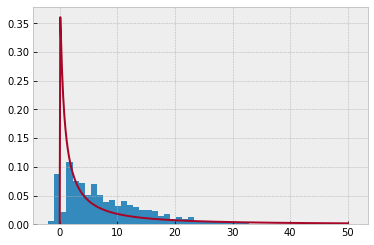

In [246]:
# Modeling WRs
from scipy.stats import lognorm

plt.hist(wr_scores, bins=50, normed=True)
wr_scores[wr_scores <= 0] = .01

X = np.linspace(0, 50, 501)
y = lognorm.pdf(x=X, s=np.std(np.log(wr_scores + .01)),
                scale=np.exp(np.mean(np.log(wr_scores + .01))))

plt.plot(X, y)

## Portfolio

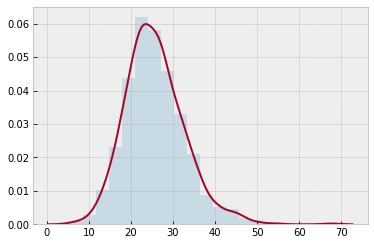

In [247]:
def simulate_by_position(grp, n_iters):
    values = grp.drop('position').dropna().astype(np.float32)
    if len(values) < 3 or values.sum() <= 0:
        return None

    if grp['position'] == 'QB':
        return pd.Series(t.rvs(df=values.sum(),
                         loc=values.mean(), scale=values.std(), size=n_iters))
    else:
        values[values <= 0] = .01
        return pd.Series(lognorm.rvs(
            s=np.std(np.log(values)),
            scale=np.exp(np.mean(np.log(values))),
            size=n_iters),
        )

def simulate_performance(players, n_iters=1000, label=None, hist=True, kde=True):
    if isinstance(players, str):
        players = [players]

    selected = df.loc[df['name'].isin(players), range(1, 17)]
    selected['position'] = df['position']
    v = selected.apply(simulate_by_position, n_iters=n_iters, axis=1)
    
    final = np.sum(v.values, axis=0)
    if hist:
        plt.hist(final, bins=20, normed=True, alpha=.2)
    if kde:
        sns.kdeplot(final, label=label)
    plt.legend(loc=0)
    return final

s = simulate_performance(['Marcus Mariota', 'Delanie Walker'], 1000)

[('Tyrod Taylor', 15.31233632375627),
 ('Dak Prescott', 15.210794278171896),
 ('Jarvis Landry', 13.631252813828155),
 ('Alvin Kamara', 13.31251508819637),
 ('Davante Adams', 10.684262337208771),
 ('Lamar Miller', 9.793761175831412),
 ('Benjamin Watson', 6.917030875392656),
 ('Kyle Rudolph', 5.819716492202477),
 ('Emmanuel Sanders', 5.564011999478767),
 ('Jamison Crowder', 5.36780892909439),
 ('Geronimo Allison', 5.081899721717817),
 ('Tyler Lockett', 3.2902457161643186),
 ('Corey Clement', 3.261686784480111),
 ('Cole Beasley', 3.233664667066704)]

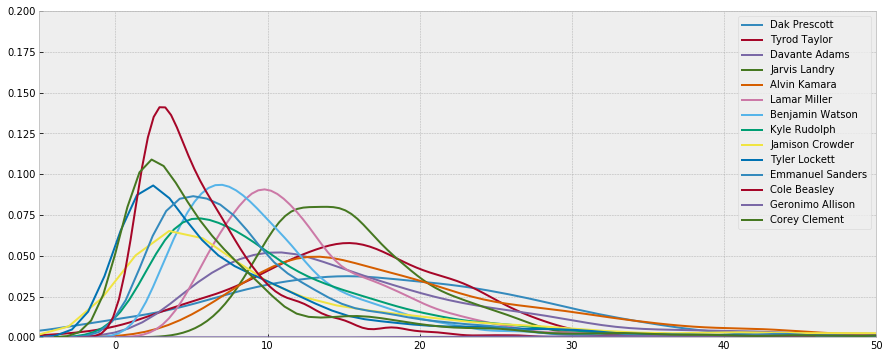

In [307]:
import peakutils
from scipy.stats import gaussian_kde

plt.figure(figsize=(15,6))

AVAILABLE = [
    'Dak Prescott',
    'Tyrod Taylor',
    'Davante Adams',
    'Jarvis Landry',
    'Alvin Kamara',
    'Lamar Miller',
    'Benjamin Watson',
    'Kyle Rudolph',
    'Jamison Crowder',
    'Tyler Lockett',
    'Emmanuel Sanders',
    'Cole Beasley',
    'Geronimo Allison',
    'Corey Clement',
]

peaks = {}
for p in AVAILABLE:
    performance = simulate_performance(p, label=p, hist=False)
    g = gaussian_kde(performance)
    x = np.arange(performance.min(), performance.max(), .01)
    y = g.pdf(x)
    peaks[p] = x[peakutils.indexes(y)][0]

plt.ylim(0, .2)
plt.xlim(-5, 50)
sorted(peaks.iteritems(), key=lambda x: x[1], reverse=True)

[{'id': 192,
  'members': ['Dak Prescott',
   'Jarvis Landry',
   'Emmanuel Sanders',
   'Jamison Crowder',
   'Lamar Miller',
   'Alvin Kamara',
   'Kyle Rudolph'],
  'win_pct': 0.4492},
 {'id': 193,
  'members': ['Dak Prescott',
   'Jarvis Landry',
   'Emmanuel Sanders',
   'Jamison Crowder',
   'Lamar Miller',
   'Alvin Kamara',
   'Benjamin Watson'],
  'win_pct': 0.4336},
 {'id': 72,
  'members': ['Tyrod Taylor',
   'Jarvis Landry',
   'Emmanuel Sanders',
   'Jamison Crowder',
   'Lamar Miller',
   'Alvin Kamara',
   'Kyle Rudolph'],
  'win_pct': 0.4314},
 {'id': 73,
  'members': ['Tyrod Taylor',
   'Jarvis Landry',
   'Emmanuel Sanders',
   'Jamison Crowder',
   'Lamar Miller',
   'Alvin Kamara',
   'Benjamin Watson'],
  'win_pct': 0.4108},
 {'id': 200,
  'members': ['Dak Prescott',
   'Jarvis Landry',
   'Emmanuel Sanders',
   'Jamison Crowder',
   'Alvin Kamara',
   'Jay Ajayi',
   'Kyle Rudolph'],
  'win_pct': 0.4094},
 {'id': 201,
  'members': ['Dak Prescott',
   'Jarvis Landr

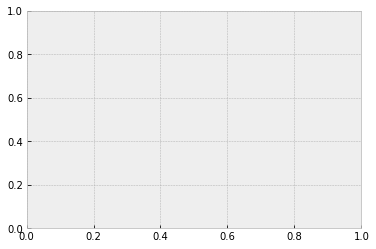

In [314]:
from pprint import pprint
import itertools

qbs = ['Tyrod Taylor', 'Dak Prescott']
wrs = ['Davanate Adams', 'Jarvis Landry', 'Emmanuel Sanders', 'Jamison Crowder', 'Geronimo Allison'
       'Cole Beasley']
rbs = ['Lamar Miller', 'Alvin Kamara', 'Corey Clement', 'Jay Ajayi']
tes = ['Kyle Rudolph', 'Benjamin Watson']

wr_combinations = itertools.combinations(wrs, 3)
rb_combinations = itertools.combinations(rbs, 2)
teams = list(itertools.product(qbs, wr_combinations, rb_combinations, tes))

teams_flattened = []
for team in teams:
    members = []
    for tup in team:
        if isinstance(tup, str):
            members.append(tup)
        else:
            members.extend(list(tup))
    teams_flattened.append(members)

OPPONENT = [
    'Tom Brady',
    'Ezekiel Elliott',
    'Carlos Hyde',
    'A.J. Green',
    'Marvin Jones Jr.',
    'Travis Kelce',
    'Chris Thompson',
]
opponent_sim = simulate_performance(OPPONENT, label='opponent', hist=False, kde=False, n_iters=5000)

team_sims = []
for i, team in enumerate(teams_flattened):
    team_sim = simulate_performance(team, label=str(i), hist=False, kde=False, n_iters=5000)
    data = {
        'id': i,
        'members': list(team),
        'win_pct': (team_sim > opponent_sim).mean()
    }
    team_sims.append(data)

sorted(team_sims, key=lambda x: x['win_pct'], reverse=True)

## Player Rankings

In [250]:
def _report_simulation(grp, n_iters):
    scores = grp.loc[range(1, 17) + ['position']]
    perf = simulate_by_position(grp=scores, n_iters=n_iters)
    
    if perf is None:
        return None
    
    perc = np.percentile(perf, [25, 50, 75])
    return pd.Series({
        'name': grp['name'],
        'position': grp['position'],
        'tp25': perc[0],
        'tp50': perc[1],
        'mean': perc.mean(),
        'tp75': perc[2],
    })

player_ratings = df.apply(_report_simulation, n_iters=1000, axis=1).dropna()

In [251]:
pd.options.display.float_format='{:20,.2f}'.format
player_ratings = player_ratings.loc[player_ratings.name != 'Sean Mannion']  # busted
player_ratings.sort_values('tp25', ascending=False)

,mean,name,position,tp25,tp50,tp75
00-0032187,25.99,David Johnson,RB,21.01,25.66,31.30
00-0032950,21.58,Carson Wentz,QB,17.94,21.46,25.33
00-0033537,24.01,Deshaun Watson,QB,17.02,23.55,31.47
00-0029263,21.97,Russell Wilson,QB,16.59,21.87,27.44
00-0030496,21.60,Le'Veon Bell,RB,16.15,21.12,27.52
00-0030564,19.95,DeAndre Hopkins,WR,15.51,19.64,24.69
00-0032241,22.92,Todd Gurley,RB,15.37,22.08,31.32
00-0023436,19.52,Alex Smith,QB,14.04,19.64,24.89
00-0020531,16.52,Drew Brees,QB,13.95,16.51,19.09
00-0029604,18.47,Kirk Cousins,QB,13.86,18.32,23.22


In [293]:
player_ratings.sort_values('tp25', ascending=False).iloc[:20].loc[:, 'tp25'].mean()

14.448314483229769

In [306]:
from sklearn.preprocessing import RobustScaler

# scl = RobustScaler()

# scores = pd.DataFrame(
#     scl.fit_transform(player_ratings[['tp25', 'tp50', 'tp25']]),
#     columns=['score25', 'score50', 'score75'],
# )
# scores = pd.concat([player_ratings.reset_index(), scores.reset_index()], axis=1)
# scores.sort_values('score25', ascending=False)

def calculate_vorp(data, position):
    POSITIONS = {
        'QB': 25,
        'RB': 30,
        'WR': 45,
        'TE': 15,
    }

    df = (
        data.loc[data['position'] == position, ['tp25', 'tp50', 'tp75']]
    )
    metrics = []
    for metric in ['tp25', 'tp50', 'tp75']:
        smaller = df.sort_values(metric, ascending=False).iloc[:POSITIONS[position]].loc[:, metric].mean()

        metric = df[metric].apply(lambda x: x - smaller).to_frame()
        metrics.append(metric)
    
    metrics = pd.concat(metrics, axis=1)
    return metrics

positions = []
for position in ['QB', 'WR', 'RB', 'TE']:
    positions.append(calculate_vorp(player_ratings, position))

positions = pd.concat(positions, axis=0)
positions.columns=['score25', 'score50', 'score75']
positions.join(player_ratings).sort_values('score75', ascending=False).to_clipboard()

In [303]:
positions

,score25,score50,score75
00-0033537,4.73,6.65,9.69
00-0029263,4.30,4.97,5.66
00-0032950,5.65,4.56,3.56
00-0023436,1.75,2.74,3.11
00-0027939,0.96,2.66,3.53
00-0019596,1.05,1.54,1.67
00-0023459,0.55,1.39,2.02
00-0029604,1.57,1.43,1.44
00-0022924,0.26,0.58,0.51
00-0033106,-0.35,-0.11,-0.56


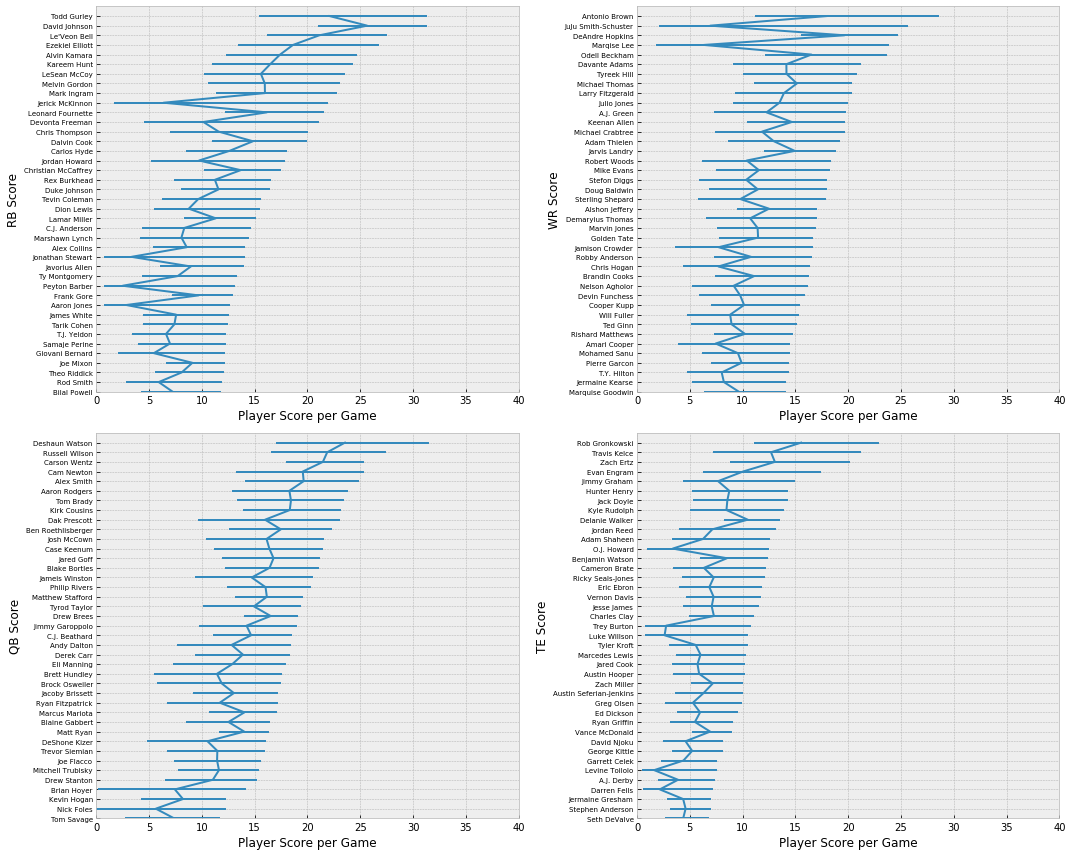

In [252]:
METRIC = 'tp75'

remaining_players = player_ratings.loc[
    ~player_ratings.name.isin([
#         "Le'Veon Bell",
    ])
]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

rks = {}
for pos, ax in zip(['RB', 'WR', 'QB', 'TE'], np.ravel(axes)):
    data = (
        remaining_players.loc[remaining_players.position == pos]
        .sort_values(METRIC, ascending=True)
        .reset_index()
    )
    rks[pos] = data
    ax.errorbar(y=data.index, x=data['tp50'],
                xerr=np.abs((data[['tp50', 'tp50']].values - data[['tp25', 'tp75']].values).T))
    ax.set_xlabel('Player Score per Game')
    ax.set_ylabel('{} Score'.format(pos))
    ax.set_yticks(range(len(data)))
    ax.set_yticklabels(data['name'], fontdict={'size': 7})
    ax.set_ylim(len(data) - 40, len(data))
    ax.set_xlim(0, 40)

plt.tight_layout()

In [229]:
remaining_players.sort_values('tp75', ascending=False)

,mean,name,position,tp25,tp50,tp75
gsis_id,,,,,,
00-0032241,23.81,Todd Gurley,RB,16.01,22.55,32.86
00-0033537,25.02,Deshaun Watson,QB,17.67,24.74,32.67
00-0027793,19.10,Antonio Brown,WR,11.41,17.53,28.36
00-0029263,21.81,Russell Wilson,QB,16.16,21.49,27.79
00-0030496,21.51,Le'Veon Bell,RB,16.29,20.89,27.35
00-0027939,19.48,Cam Newton,QB,13.06,19.66,25.73
00-0033857,11.12,JuJu Smith-Schuster,WR,1.67,6.26,25.43
00-0033045,19.05,Ezekiel Elliott,RB,13.39,18.35,25.40
00-0032950,21.51,Carson Wentz,QB,17.94,21.45,25.15


## Strength of Schedule

In [ ]:
players_long = pd.melt(df.reset_index().drop(0, axis=1), id_vars=['index', 'name', 'position', 'team'],
                       var_name='week', value_name='ppr_points').set_index('index')
players_long

In [ ]:
players_long.loc[(players_long.name == 'LeGarrette Blount') & (players_long.week > CURRENT_WEEK), 'team'] = 'NE'
players_long.loc[(players_long.name == 'Jordan Matthews') & (players_long.week > CURRENT_WEEK), 'team'] = 'PHI'
players_long.loc[(players_long.name == 'Sammy Watkins') & (players_long.week > CURRENT_WEEK), 'team'] = 'BUF'
players_long.loc[(players_long.name == 'Robert Woods') & (players_long.week > CURRENT_WEEK), 'team'] = 'BUF'
players_long.loc[(players_long.name == 'Alshon Jeffery') & (players_long.week > CURRENT_WEEK), 'team'] = 'CHI'
players_long.loc[(players_long.name == 'Brock Osweiler') & (players_long.week > CURRENT_WEEK), 'team'] = 'HOU'
players_long.loc[(players_long.name == 'Adrian Peterson') & (players_long.week > CURRENT_WEEK), 'team'] = 'MIN'
players_long.loc[(players_long.name == 'Pierre Garcon') & (players_long.week > CURRENT_WEEK), 'team'] = 'SF'
players_long.loc[(players_long.name == 'Jeremy Kerley') & (players_long.week > CURRENT_WEEK), 'team'] = 'SF'
players_long.loc[(players_long.name == 'Jermaine Kearse') & (players_long.week > CURRENT_WEEK), 'team'] = 'SEA'

In [ ]:
df.loc[(df.name.str.contains('Williams'))]

In [ ]:
TEAM_RENAMES = {
    'JAX': 'JAC',
    # 'LAC': 'SDC',
}

teams = []

for week in range(1, 17):
    if week < CURRENT_WEEK:
        year = 2017
    else:
        year = 2016
    games = nflgame.games(year, week=week)
    team_dict = {}
    for g in games:
        away_team = TEAM_RENAMES.get(g.away, g.away)
        home_team = TEAM_RENAMES.get(g.home, g.home)
        team_dict[home_team] = away_team
        team_dict[away_team] = home_team

    teams.append(team_dict)

teams

In [ ]:
def find_opposing_team(grp):
    return teams[grp['week'] - 1].get(grp['team'])

players_long.loc[:, 'opposing_team'] = players_long.apply(find_opposing_team, axis=1)
opposing_team = players_long.groupby(['position', 'opposing_team', 'week']).ppr_points.sum().unstack(-1)
opposing_team.loc['QB']

In [ ]:
print opposing_team.loc[('QB')].mean(1).sort_values(ascending=False)
opposing_team.loc['QB']

In [ ]:
bye_mask = opposing_team.loc[('QB')].copy(deep=True)
bye_mask[bye_mask > -100] = 0

opposing_team.loc[('TE')].fillna(bye_mask, inplace=True)
opposing_team